In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


### Part 1: Prepare the Data

1. Read `myopia.csv` into a Pandas DataFrame.

2. Remove the "MYOPIC" column from the dataset.

    * **Note:** The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already! 

3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [2]:
csv_path = 'Resources/myopia.csv'

df = pd.read_csv(csv_path)
myopia_df = df.drop(columns = 'MYOPIC')
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [3]:
# Standardize the dataset with StandardScaler
scaler = StandardScaler()
myopia_scaled = scaler.fit_transform(myopia_df)

### Part 2: Apply Dimensionality Reduction

1. Perform dimensionality reduction with PCA. How did the number of the features change?


  * **Hint:** Rather than specify the number of principal components when you instantiate the PCA model, state the desired **explained variance**. For example, say that a dataset has 100 features. Using `PCA(n_components=0.99)` creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.

2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation. 

3. Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [4]:
# Dimensionality reduction with PCA maintaining an explained variance of 90%
pca = PCA(n_components=0.90)
myopia_pca = pca.fit_transform(myopia_scaled)

In [5]:
# Reduce the dataset demensions with t-SNE
tsne = TSNE(learning_rate=250, n_iter=2000, random_state = 50)
myopia_tsne = tsne.fit_transform(myopia_pca)
myopia_tsne.shape

(618, 2)

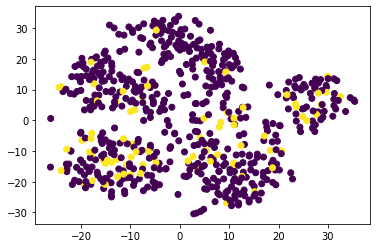

In [6]:
# Create a scatter plot of the t-SNE output
plt.scatter(myopia_tsne[:,0],myopia_tsne[:,1], c = df['MYOPIC'])
plt.show()


### Part 3: Perform a Cluster Analysis with K-means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

* Use a `for` loop to determine the inertia for each `k` between 1 through 10. 

* If possible, determine where the elbow of the plot is, and at which value of `k` it appears.


In [7]:
myopia_pca_df = pd.DataFrame(myopia_pca)

In [8]:
# Use for loop to determine the inertia for each k between 1 through 10
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589
5,6,5149.524688
6,7,4925.071941
7,8,4756.274760
8,9,4596.931418
9,10,4483.539918


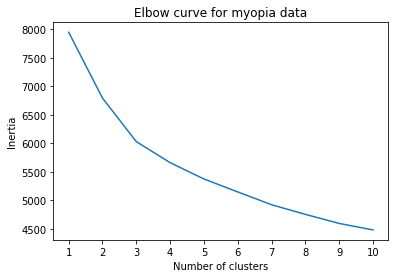

In [9]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

In [10]:
# Create a get_clusters function that finds k clusters in the myopia_pca data
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [11]:
# Using k=3
clusters = get_clusters(3, myopia_pca_df)
clusters

,0,1,2,3,4,5,6,7,8,9,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1
...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,0
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,1
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,1
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,0


### Part 4: Make a Recommendation

Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters? 

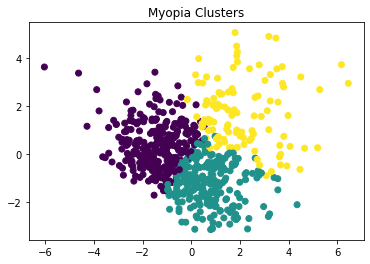

In [13]:

plt.scatter(x=myopia_pca_df[0], y=myopia_pca_df[1], c=myopia_pca_df["class"])
plt.title("Myopia Clusters")
plt.show()

### Recommendations:
Based on the information above, it appears that the patients can be clustered into three clusters since the elbow was at k=3, however the demensionality of the data was significantly reduced to two features.